# Project Report IV: Finally, Some Data Analysis!
___
**Brief:**<br>
In this report, I'll be taking on the unsupervised and then supervised learning tasks for my project.

**Sections:**<br>
1. [Failed Unsupervised Learning: A Prologue](#1)
2. [Data Exploration](#2)
3. [Supervised Learning](#2)
___
<a id='1'>

## Failed Unsupervised Learning: A Prologue
<a id='1a'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import nltk
from nltk.corpus import PlaintextCorpusReader as cr
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pickle
file = open('email_df', 'rb')
email_df = pickle.load(file)
file.close()

In [3]:
small_df = email_df.sample(10000)
small_df[:5]

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User
85691,"Wed, 15 Nov 2000 23:55:00 -0800 (PST)",dgagliardi@reliantenergy.com,clint.dean@enron.com,True Orange Fax/E-Mail #107,1.0,Clint.dean@enron.com,,,\Clint_Dean_Dec2000\Notes Folders\Info,Dean-C,cdean.nsf,None,---------------------- Forwarded by David M Ga...,info,dean-c
85556,"Mon, 30 Jul 2001 07:17:19 -0700 (PDT)",dgagliardi@reliant.com,FW: True Orange E-Mail/Fax #69,1.0,text/plain; charset=us-ascii,,,"\CDEAN (Non-Privileged)\Dean, Clint\Info",DEAN-C,CDEAN (Non-Privileged).pst,None,None,\n----- Forwarded by David M Gagliardi/TTG/Hou...,info,dean-c
99409,"Wed, 17 Jan 2001 03:11:00 -0800 (PST)",mjones7@txu.com,"daren.j.farmer@enron.com, ggreen2@txu.com, cst...","HPL Nom for January 18, 2001",1.0,"daren.j.farmer@enron.com, ""Gary Green"" <ggreen...",,,\Darren_Farmer_Jun2001\Notes Folders\All docum...,Farmer-D,dfarmer.nsf,None,(See attached file: HPLN0118.xls)\n\n - HPLN01...,all_documents,farmer-d
30761,"Mon, 9 Apr 2001 10:53:00 -0700 (PDT)",sally.beck@enron.com,"bob.hall@enron.com, beth.apollo@enron.com, bre...",Hold the Date,1.0,"Bob M Hall, Beth Apollo, Brent A Price, Brenda...",,,\Sally_Beck_Jun2001\Notes Folders\'sent mail,Beck-S,sbeck.nsf,None,Beth Apollo has recently joined the team and B...,_sent_mail,beck-s
29579,"Fri, 19 Oct 2001 11:44:44 -0700 (PDT)",sally.beck@enron.com,c..gossett@enron.com,RE: Names Needed for Golf Tournament,1.0,"Gossett, Jeffrey C. </O=ENRON/OU=NA/CN=RECIPIE...",,,\SBECK (Non-Privileged)\Sent Items,Beck-S,SBECK (Non-Privileged).pst,None,"Thanks, Jeff. I will get you more info for yo...",sent_items,beck-s


*Note*: So at this point, there is just too much data. Going to use "small_df" the rest of the way.

In [4]:
#vectorizer = TfidfVectorizer(stop_words="english")
#text_tfidf = vectorizer.fit_transform(text)
#text_tfidf

In [5]:
#from sklearn.cluster import KMeans
#k_model = KMeans(n_clusters=3)
#k_model.fit(text_tfidf)
#k_model.predict(text_tfidf)
#labels = k_model.labels_

In [6]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#plot = plt.figure()
#ax = Axes3D(plot, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax.scatter(text[:, 3], text[:, 0], text[:, 2],
#          c=labels.astype(np.float), edgecolor="k", s=50)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("z")
#plt.title("K Means", fontsize=14)

*Summary*: So, ultimately this has been a very confusing experience for me. I tried to take on unsupervised learning, but I'm really finding myself learning much more on tutorials than I'd like to. Instead, let's take a step back and look other parts of the data, then revisit this.
<a id='2'>

## Data Exploration

***DateTime and Chronology***<br>
Much of what follows is inspired by a fantastic resource I found on Kaggle (https://www.kaggle.com/dfoly1/k-means-clustering-from-scratch). I'll be using it to help organize my DF better (the _to_datetime_ thing and much of the unsupervised learning).

My first goal is to get a sense of when these emails were sent, so we'll be using the DateTime library!

In [7]:
small_df['Date'] = pd.to_datetime(small_df['Date'], infer_datetime_format=True)

In [19]:
months = []
days = []
years = []
for date in small_df['Date']:
    months.append(date.month)
    days.append(date.day)
    years.append(date.year)
small_df["Month"] = months
small_df["Day"] = days
small_df["Year"] = years
small_df[:5]

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
85691,2000-11-15 23:55:00-08:00,dgagliardi@reliantenergy.com,clint.dean@enron.com,True Orange Fax/E-Mail #107,1.0,Clint.dean@enron.com,,,\Clint_Dean_Dec2000\Notes Folders\Info,Dean-C,cdean.nsf,None,---------------------- Forwarded by David M Ga...,info,dean-c,11,15,2000
85556,2001-07-30 07:17:19-07:00,dgagliardi@reliant.com,FW: True Orange E-Mail/Fax #69,1.0,text/plain; charset=us-ascii,,,"\CDEAN (Non-Privileged)\Dean, Clint\Info",DEAN-C,CDEAN (Non-Privileged).pst,None,None,\n----- Forwarded by David M Gagliardi/TTG/Hou...,info,dean-c,7,30,2001
99409,2001-01-17 03:11:00-08:00,mjones7@txu.com,"daren.j.farmer@enron.com, ggreen2@txu.com, cst...","HPL Nom for January 18, 2001",1.0,"daren.j.farmer@enron.com, ""Gary Green"" <ggreen...",,,\Darren_Farmer_Jun2001\Notes Folders\All docum...,Farmer-D,dfarmer.nsf,None,(See attached file: HPLN0118.xls)\n\n - HPLN01...,all_documents,farmer-d,1,17,2001
30761,2001-04-09 10:53:00-07:00,sally.beck@enron.com,"bob.hall@enron.com, beth.apollo@enron.com, bre...",Hold the Date,1.0,"Bob M Hall, Beth Apollo, Brent A Price, Brenda...",,,\Sally_Beck_Jun2001\Notes Folders\'sent mail,Beck-S,sbeck.nsf,None,Beth Apollo has recently joined the team and B...,_sent_mail,beck-s,4,9,2001
29579,2001-10-19 11:44:44-07:00,sally.beck@enron.com,c..gossett@enron.com,RE: Names Needed for Golf Tournament,1.0,"Gossett, Jeffrey C. </O=ENRON/OU=NA/CN=RECIPIE...",,,\SBECK (Non-Privileged)\Sent Items,Beck-S,SBECK (Non-Privileged).pst,None,"Thanks, Jeff. I will get you more info for yo...",sent_items,beck-s,10,19,2001


<Figure size 432x288 with 0 Axes>

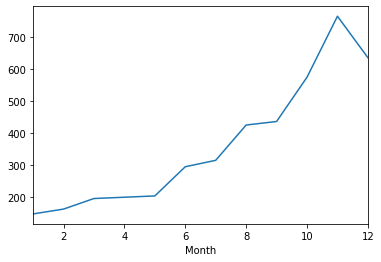

In [26]:
import matplotlib.pyplot as plt
x_ax = (small_df["Year"] == 2000)
plt.figure()
time_graph = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()

*Note*: My chronological graph is working! Onto wordclouds, common users, unique emails, and more!
<a id='1b'>

***A Census of The Users***

In [27]:
setTo = small_df["To"].nunique()
setFrom = small_df["From"].nunique()
totalSet = small_df["To"].count()
print("percentage of unique emails sent:", (setTo/totalSet)*100)
print("percentage of unique emails received:", (setFrom/totalSet)*100)

percentage of unique emails sent: 50.07
percentage of unique emails received: 25.130000000000003


In [61]:
topUsers = small_df.groupby("User")["Text"].count().sort_values(ascending=False)
user_percentages = []
total = len(small_df)
count = 0
users = list(topUsers.keys())
for num in topUsers[:10]:
    users[count]
    (num/total)*100
    count += 1

'dasovich-j'

10.08

'kaminski-v'

9.24

'jones-t'

6.88

'kean-s'

6.12

'farmer-d'

4.84

'germany-c'

4.29

'beck-s'

3.81

'bass-e'

2.74

'campbell-l'

2.4299999999999997

'guzman-m'

2.2800000000000002

***Surveying Text***

***Wordclouds***